In [1]:
import numpy as np
import pandas as pd
from PIL import Image

!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use ('ggplot')

print ('Matplotlib version: ',mpl.__version__)

Matplotlib version:  3.3.4


In [2]:
!conda install -c anaconda xlrd --yes

Solving environment: done

# All requested packages already installed.



In [5]:
df_lon = pd.read_csv("london_crime.csv")

print('Data read into pandas dataframe!')

Data read into pandas dataframe!


In [4]:
df_lon.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0.0,2016.0,11.0
1,E01001646,Greenwich,Violence Against the Person,Other violence,0.0,2016.0,11.0
2,E01000677,Bromley,Violence Against the Person,Other violence,0.0,2015.0,5.0
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0.0,2016.0,3.0
4,E01004563,Wandsworth,Robbery,Personal Property,0.0,2008.0,6.0


In [6]:
df_lon.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
1729024,E01003543,Newham,Theft and Handling,Theft/Taking Of Motor Vehicle,0.0,2014.0,7.0
1729025,E01002799,Islington,Violence Against the Person,Assault with Injury,0.0,2009.0,1.0
1729026,E01001932,Hammersmith and Fulham,Violence Against the Person,Harassment,0.0,2011.0,4.0
1729027,E01000902,Camden,Robbery,Business Property,0.0,2012.0,9.0
1729028,E01002470,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_lon.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [8]:
df_lon.drop(['lsoa_code'], axis=1, inplace=True)
df_lon.head(2)

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0.0,2016.0,11.0
1,Greenwich,Violence Against the Person,Other violence,0.0,2016.0,11.0


In [10]:
df_lon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729029 entries, 0 to 1729028
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   borough         object 
 1   major_category  object 
 2   minor_category  object 
 3   value           float64
 4   year            float64
 5   month           float64
dtypes: float64(3), object(3)
memory usage: 79.1+ MB


In [11]:
df_lon.columns.values

array(['borough', 'major_category', 'minor_category', 'value', 'year',
       'month'], dtype=object)

In [12]:
df_lon.index.values

array([      0,       1,       2, ..., 1729026, 1729027, 1729028])

In [13]:
df_lon.shape

(1729029, 6)

In [14]:
df_lon['Total']=df_lon.sum(axis=1)

In [15]:
df_lon.isnull().any()

borough            True
major_category     True
minor_category     True
value              True
year               True
month              True
Total             False
dtype: bool

In [16]:
df_lon_area = df_lon[['borough','value']]

In [17]:
years=df_lon['year'].unique()

years

array([2016., 2015., 2008., 2012., 2010., 2013., 2014., 2011., 2009.,
         nan])

In [18]:
sum_crime= df_lon.groupby('year').sum()
sum_crime

#untuk mengetahui total kejahatan yang terjadi setiap tahunnya

,value,month,Total
year,,,
2008.0,94142.0,1253884.0,387912122.0
2009.0,90516.0,1251981.0,387994637.0
2010.0,90654.0,1251308.0,388564442.0
2011.0,91440.0,1250885.0,387830382.0
2012.0,94563.0,1250134.0,388423317.0
2013.0,87824.0,1244785.0,387415944.0
2014.0,86217.0,1249021.0,387650648.0
2015.0,90918.0,1243429.0,386967062.0
2016.0,94372.0,1245587.0,388099479.0


In [19]:
print(plt.style.available)
mpl.style.use(['ggplot'])

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [20]:
sum_value= sum_crime['value'].to_numpy()
sum_value

array([94142., 90516., 90654., 91440., 94563., 87824., 86217., 90918.,
       94372.])

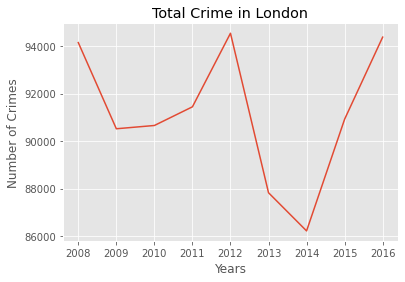

In [33]:
%matplotlib inline

plt.style.use('ggplot')

Years = [2008,2009,2010,2011,2012,2013,2014,2015,2016]
Total = [94142, 90516, 90654, 91440, 94536, 87824, 86217, 90918,94372]

plt.plot(Years, Total)
plt.title('Total Crime in London')
plt.ylabel('Number of Crimes')
plt.xlabel('Years')
plt.show()

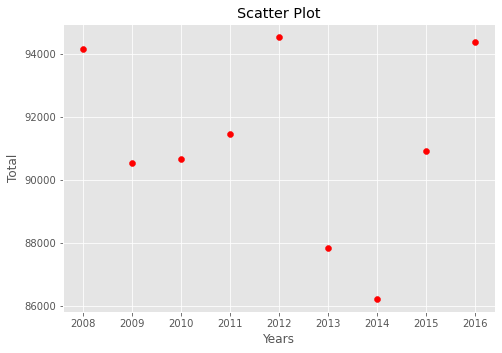

In [34]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Years = [2008,2009,2010,2011,2012,2013,2014,2015,2016]
Total = [94142, 90516, 90654, 91440, 94536, 87824, 86217, 90918,94372]

ax.scatter(Years,Total,color='red')
ax.set_xlabel('Years')
ax.set_ylabel('Total')
ax.set_title('Scatter Plot')


plt.show()

In [37]:
df_lon_sorted= df_lon.sort_values(by='value', axis=0, ascending=False)
df_top5= df_lon_sorted.head()
df_top5

,lsoa_code,borough,major_category,minor_category,value,year,month
1608904,E01004234,Tower Hamlets,Drugs,Possession Of Drugs,309.0,2012.0,6.0
247184,E01004734,Westminster,Theft and Handling,Other Theft,241.0,2009.0,5.0
942708,E01033595,Westminster,Theft and Handling,Other Theft,204.0,2012.0,3.0
804325,E01033595,Westminster,Theft and Handling,Other Theft,194.0,2012.0,2.0
829375,E01004763,Westminster,Theft and Handling,Other Theft,168.0,2011.0,7.0


In [38]:
df_top5.shape

(5, 7)

In [44]:
df_top5.index.

Int64Index([1608904, 247184, 942708, 804325, 829375], dtype='int64')

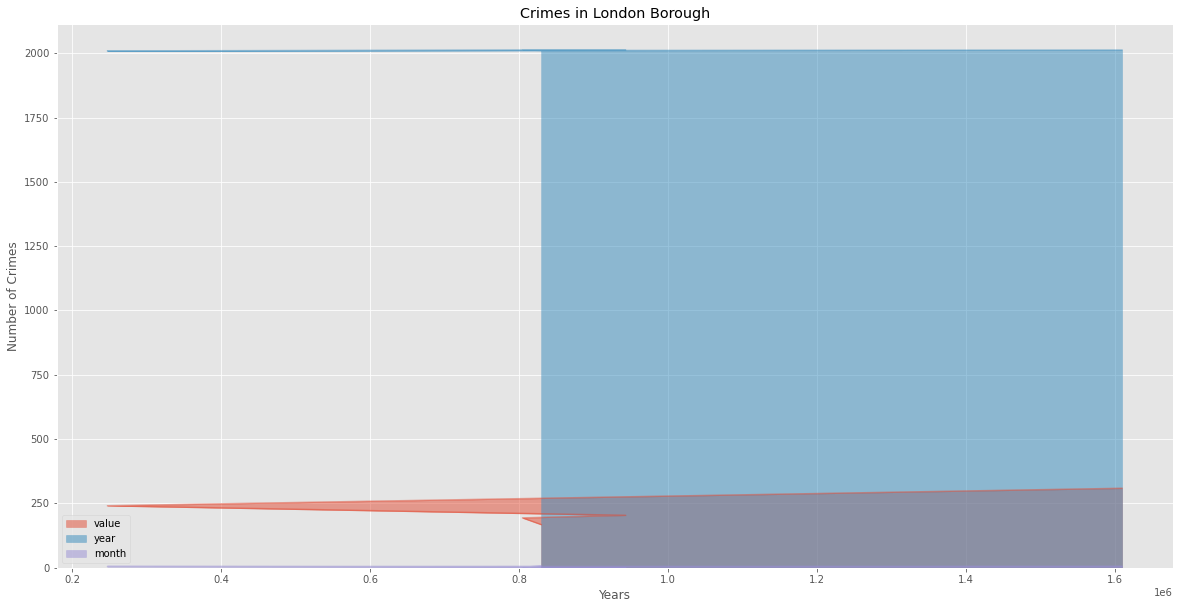

In [42]:
df_top5.index = df_top5.index.map(int)

df_top5.plot(kind='area', stacked=False, figsize=(20,10))

plt.title('Crimes in London Borough')
plt.ylabel('Number of Crimes')
plt.xlabel('Years')

plt.show()

In [26]:
df_lon = pd.read_csv('london_crime.csv')

In [27]:
df_lon.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0.0,2016.0,11.0
1,E01001646,Greenwich,Violence Against the Person,Other violence,0.0,2016.0,11.0
2,E01000677,Bromley,Violence Against the Person,Other violence,0.0,2015.0,5.0
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0.0,2016.0,3.0
4,E01004563,Wandsworth,Robbery,Personal Property,0.0,2008.0,6.0


In [28]:
total_crime = df_lon['value'].sum()
total_crime

820646.0

In [29]:
df_lon.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0.0,2016.0,11.0
1,E01001646,Greenwich,Violence Against the Person,Other violence,0.0,2016.0,11.0
2,E01000677,Bromley,Violence Against the Person,Other violence,0.0,2015.0,5.0
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0.0,2016.0,3.0
4,E01004563,Wandsworth,Robbery,Personal Property,0.0,2008.0,6.0


In [30]:
df_lon_sorted= df_lon.sort_values(by='value', axis=0, ascending=False)
df_top5= df_lon_sorted.head()
df_top5

,lsoa_code,borough,major_category,minor_category,value,year,month
1608904,E01004234,Tower Hamlets,Drugs,Possession Of Drugs,309.0,2012.0,6.0
247184,E01004734,Westminster,Theft and Handling,Other Theft,241.0,2009.0,5.0
942708,E01033595,Westminster,Theft and Handling,Other Theft,204.0,2012.0,3.0
804325,E01033595,Westminster,Theft and Handling,Other Theft,194.0,2012.0,2.0
829375,E01004763,Westminster,Theft and Handling,Other Theft,168.0,2011.0,7.0


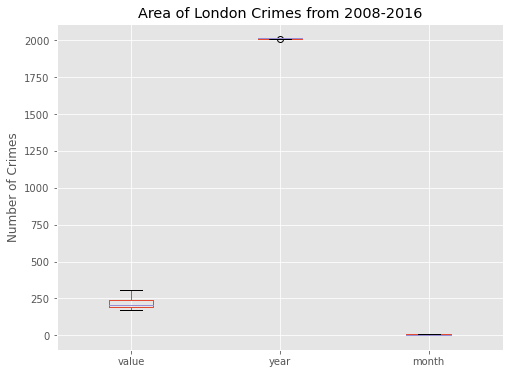

In [31]:
df_top5.plot(kind='box', figsize=(8,6))

plt.title('Area of London Crimes from 2008-2016')
plt.ylabel('Number of Crimes')

plt.show()